In [ ]:
#!pip install osmnx>=0.13

In [1]:
import osmnx as ox
print(ox.__version__)
ox.config(log_file=False, log_console=False, use_cache=True)

1.1.2


In [2]:
# establecemos un conjunto de coordenadas arbitrarias
norte, sur, este, oeste = -34.506274, -34.533818, -58.566442, -58.589830

# instanciamos nuestro grafo con bounding box
G = ox.graph_from_bbox(norte, sur, este, oeste, network_type='walk')

In [3]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

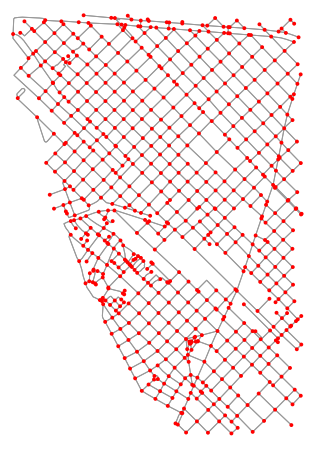

In [4]:
fig, ax = ox.plot_graph(G, bgcolor='w',node_color='r')

In [5]:
from accesibilidad import *

### Degree centrality 

In [6]:
dc = nx.degree_centrality(G)
nx.set_node_attributes(G, values=dc, name="Degree centrality")

In [7]:
plot_nodes_folium(G, attr_name='Degree centrality', tiles='openstreetmap', palette='viridis', 
                  zoom=14, fit_bounds=False, add_legend=True)

### Betweenness centrality 

In [8]:
D = ox.utils_graph.get_digraph(G) # from multiple to single edges 

bc_wl = nx.betweenness_centrality(D, normalized=True, weight='length')
nx.set_node_attributes(G, values=bc_wl, name="Betweenness centrality")

In [9]:
plot_nodes_folium(G, attr_name='Betweenness centrality', palette='plasma', fit_bounds=True, add_legend=True)

### Node degree

In [10]:
nd = dict(G.degree())
nx.set_node_attributes(G, values=nd, name="Node degree")

In [11]:
plot_nodes_folium(G, attr_name='Node degree', palette='YlOrRd', tiles='Stamen Terrain', 
                  fit_bounds=True, add_legend=True)